![alt text](viasat-logo2_0.png "Title")

# SGM A-level test data evaluation notebook

This notebook takes the dataframes previouly created by "SGM A_Test_Read_Data" notebook that extracted the data from the A-level test result text files. This notebook combines all the individual dataframes in the A_Level_Code_Test_Extracted folder into one. Subsequently that dataframe is used to display different aspects of the results in a way that it provides additional insight.

### Python libraries and selecting extracted data files

In [1]:
# Import libraries
import re # regular expressions library
import pandas as pd # pandas library for dataframes
import numpy as np # numpy library for numerical operations

![alt text](DataFlow.png "Title")

In [2]:
# Read all file names in the extracted data folder
# store the file names in the file_list variable
# only include text files
# print out all of the file names

source_dir = 'A_Level_Code_Test_Extracted' # name of directory containing extracted files
file_list = []
import os
for file in os.listdir(source_dir): # go through each files in directory
    if (file.endswith(".txt")) | (file.endswith(".TXT")): # check if they are text files
        print(os.path.join(source_dir, file)) # print out names
        file_list.append(file) # add names to list

A_Level_Code_Test_Extracted\P15247A.TXT
A_Level_Code_Test_Extracted\P15248A.TXT
A_Level_Code_Test_Extracted\P15249A.TXT
A_Level_Code_Test_Extracted\P15250A.TXT
A_Level_Code_Test_Extracted\P15256A.TXT
A_Level_Code_Test_Extracted\P15259A.TXT
A_Level_Code_Test_Extracted\P15260A.TXT
A_Level_Code_Test_Extracted\P15265A.TXT
A_Level_Code_Test_Extracted\P15266A.TXT
A_Level_Code_Test_Extracted\P15275A.TXT
A_Level_Code_Test_Extracted\P15276A.TXT
A_Level_Code_Test_Extracted\P15280A.TXT
A_Level_Code_Test_Extracted\P15284A.TXT
A_Level_Code_Test_Extracted\P15285A.TXT
A_Level_Code_Test_Extracted\P15287A.TXT
A_Level_Code_Test_Extracted\P15292A.TXT
A_Level_Code_Test_Extracted\P15294A.TXT
A_Level_Code_Test_Extracted\P15440A.TXT
A_Level_Code_Test_Extracted\P15443A.TXT
A_Level_Code_Test_Extracted\P15446A.TXT
A_Level_Code_Test_Extracted\P15448A.TXT
A_Level_Code_Test_Extracted\P15449A.TXT
A_Level_Code_Test_Extracted\P15451A.TXT
A_Level_Code_Test_Extracted\P15452A.TXT
A_Level_Code_Test_Extracted\P15454A.TXT


### Combine all the data into one data frame

In [3]:
# Read in each dataframe and concatinate them
source_file = source_dir + '/' + file_list[0] # combine directory and file name, first file
df = pd.read_csv(source_file, index_col='SN') # initialize dataframe with first file

fl = file_list[1:] # take out first file from list, prevent reading it twice

for file in fl: # go trough all file names
    source_file = source_dir + '/' + file # generate full path
    df1 = pd.read_csv(source_file, index_col='SN') # read dataframes from text files
    df = pd.concat([df, df1]) # concatanate them

## A-level 5 KHz DAMA BER test results

#### A-level 5 KHz DAMA test cases

These test cases were selected because they provide results that make the plots more "interesting"

             Ch bit rate   FEC   Data Rate   EbNo  BER Spec
     Test 1   6000 Tx      1/1   2400        9.3   1E-03
     Test 2   6000 Rx      1/1   2400        9.3   1E-03
     Test 3   4800 Rx      1/2   1200        6.0   1E-05
     
   ### Plotting libraries

In [4]:
#Import plotting libraries
import matplotlib.pyplot as plt # import matplotlib library
%matplotlib inline
import seaborn as sns # import seaborn plotting library

In [5]:
#Import iPython widget libraries
import ipywidgets as wg # import widgets library
from IPython.display import display # import display library

### Array of interactive histogram plots sorted by categorical variables

The plot shows an array of histograms sorted by year and test station number.
This would allow the user to make comparisons between test station performance and performance change over time.

The 5 KHz test case can be selected by radio buttons and the plot reacts to the change.

In [6]:
# Setup radio buttons to make a selection from the three possible A-level 5 KHz DAMA tests
test_select = wg.RadioButtons(
    # Setup button names, dataframe column names as values
    options=[('5K DAMA TC1', 'D5K1BER'), ('5K DAMA TC2', 'D5K2BER'), ('5K DAMA TC3', 'D5K3BER')], 
    value='D5K1BER', # Default value
    description='5K DAMA Test', # button description
    disabled=False
)

In [7]:
# Define the histogram plotting function and make it interact with the radio buttons defined previously.

# Set plot style
sns.set(style="darkgrid")

# Define histogram plotting function
def d5k_histplot(test_type):
    g = sns.FacetGrid(df, row="TestStNum", col="TestYear", margin_titles=True, size =3) # Setup plot canvas
    bins = np.linspace(0, 7e-4, 10) # Setup bins and plot range
    g.map(plt.hist, test_type, color="steelblue", bins=bins, lw=1) # Setup plot parameters
    plt.subplots_adjust(top=0.92) # Create margin on top of plot for title
    g.fig.suptitle('5KHz DAMA BER Test') # Add title t the plot
    
print('A-level 5 KHz DAMA BER test selection') # Print title
wg.interact(d5k_histplot, test_type=test_select) # Setup interaction between the buttons and the plot

A-level 5 KHz DAMA BER test selection


A Jupyter Widget

<function __main__.d5k_histplot>

### Comparing two distributions with added Kernel Density Estimation

The plot shows the distribution of two 5 KHz DAMA BER test values on the same plot and the added KDE plot for each.

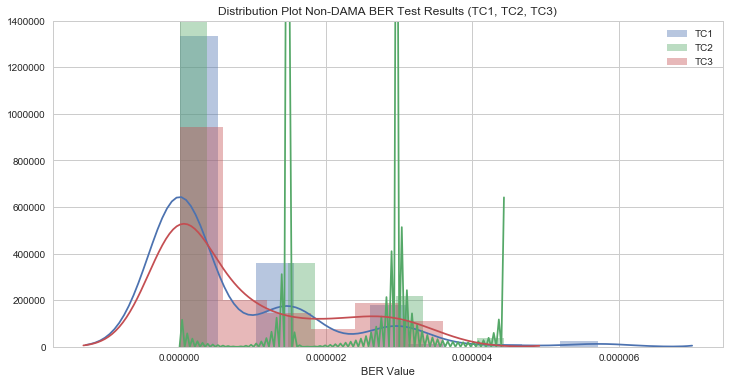

In [8]:
# Distribution plot of two variables
sns.set(style="whitegrid") # Set plot style
fig, ax = plt.subplots(figsize=(12,6)) # Figure size
ax.set_title('Distribution Plot Non-DAMA BER Test Results (TC1, TC2, TC3)') # Title

#Distribution plots of two ariables on one plot
sns.distplot(df['ND1BER'], label='TC1') # Setup TC1 plot
sns.distplot(df['ND2BER'], label='TC2') # Setup TC2 plot
sns.distplot(df['ND3BER'], axlabel='BER Value', label='TC3') # Setup TC3 plot and x label
ax.legend(['TC1', 'TC2', 'TC3']) # Plot legend


### Joint plot of variables with optional KDE

Plot two 5 KHz DAMA BER value distributions against each other and show optional regression as well as kernel density estimation.

In [9]:
# Setup radio buttons to make a selection from the three possible A-level 5 KHz DAMA tests
plot_select = wg.RadioButtons(
    # Setup button names, dataframe column names as values
    options=[('Scatter Plot', 'scatter'), ('Kernel Est, Regression', 'reg')], 
    value='reg', # Default value
    description='Plot Mode', # button description
    disabled=False
)

# Plot function
def d5k_jointplot(plot_type):
    sns.jointplot('D5K1BER', 'D5K2BER', df, kind=plot_type, xlim=(-0.0001, 0.0007), ylim=(-0.0001, 0.0007), size=6)

wg.interact(d5k_jointplot, plot_type=plot_select) # Setup interaction between the buttons and the plot

A Jupyter Widget

<function __main__.d5k_jointplot>

### Scatter plot of variables to check for correlation

The scatter plot shows one of the 5 KHz DAMA BER test results as a function of the receiver sensitivity.

(-1e-05, 0.0007)

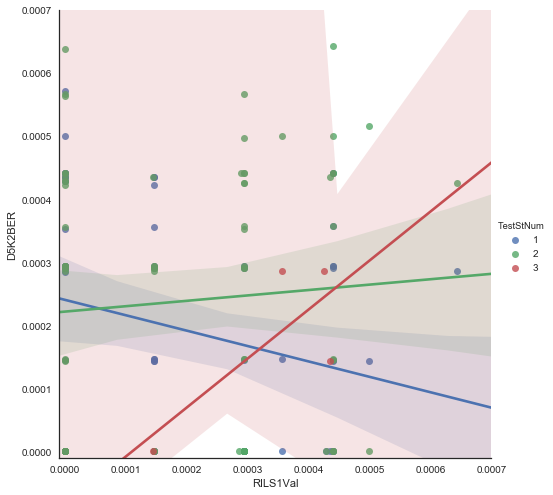

In [10]:
# Define the scatter plotusing the lm function.

# Set plot style
sns.set(style="white")

sns.lmplot( x="RILS1Val", y="D5K2BER", data=df, fit_reg=True, hue='TestStNum', legend=True, size=7)

plt.ylim(-0.00001, 0.0007)
plt.xlim(-0.00001, 0.0007)


### Boxplots comparing distribution between years and test stations

The following boxplot shows 5 KHz DAMA BER TC 1 measurement value distribution compares between results over time and between test stations.

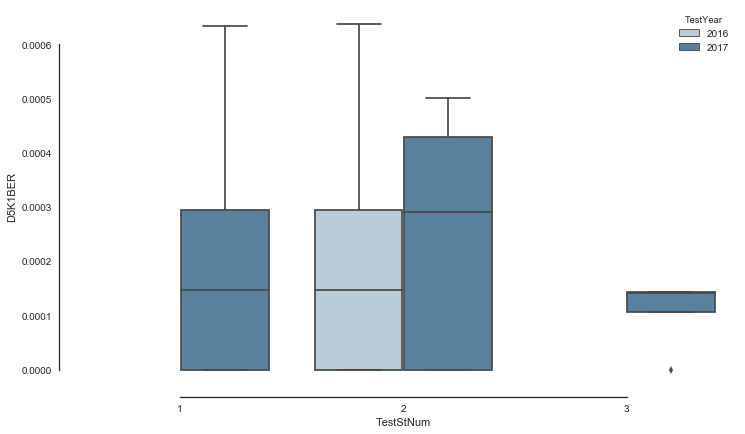

In [11]:
# Plot of BER values with seaborn

#Set style
sns.set(style='white')

plt.subplots(figsize=(12,7)) # Figure size
sns.boxplot(x="TestStNum", y="D5K1BER", hue="TestYear", data=df, palette="Blues", saturation=0.5)
sns.despine(offset=10, trim=True)

## Selecting time intervals to examine results in that period

This section selects a time period using the iPython calendar picker widget. Those start and end dates are applied to the date column of the data frame. The date column is produced by combining the date, month and year column values that are strings and transforming them into a pandas datetime variable.

### Add date column generated from string values

Generate a pandas datetime column, 'date' from the string values in the year, month and date columns.

In [12]:
# Combine the month, date and year column strings
df['date'] = df['TestMonth'].map(str) + ' ' + df['TestDate'].map(str) + ' ' + df['TestYear'].map(str)

In [13]:
# Transform the strings into pandas datetime variables
df['date'] = pd.to_datetime(df['date'])

### Define date picker widgets and filter data frame rows by those values

In [14]:
# Define start and end date widgets
start_date_hist = wg.DatePicker(
    description='Start Date',
    disabled=False
)

end_date_hist = wg.DatePicker(
    description='End Date',
    disabled=False
)

The plot below shows the measured BER values for each modem tested in a bar plot.
        * The x axis shows the modem serial numbers.
        * The y axis shows the BER value

The test results are color coded by the test station used.

The test time period of interest can be selected by the date pickers above the plot.

In [18]:
# Define the function to plot the BER values for TC2 and connect the date range to the widgets
def ber_plot(st_d, en_d):
    #Create df_date_range dataframe with only the rows in the selected date range filtered out
    mask = (df['date'] > st_d) & (df['date'] <= en_d)
    df_date_range = df.loc[mask]
    sns.set()
    fig, ax = plt.subplots(figsize=(12,7))
    print('A-level 5 KHz DAMA BER test selection')   
    sns.barplot(x=df_date_range.index, y='D5K2BER', hue='TestStNum', data=df_date_range)
    
wg.interact(ber_plot, st_d=start_date_hist, en_d=end_date_hist)

A Jupyter Widget

<function __main__.ber_plot>

### Weekly SGM Modem Production ATP Test Numbers

Show the number of ATP test results aggregated per week within a selected time period.

In [16]:
# Define start and end date widgets
start_date_bar = wg.DatePicker(
    description='Start Date',
    disabled=False
)

end_date_bar = wg.DatePicker(
    description='End Date',
    disabled=False
)

In [17]:
#Turn off warning
import warnings
warnings.filterwarnings('ignore')

#Plot weekly test volume numbers
def atp_prod_plot(st_d, en_d):
    sns.set(style="whitegrid")
    mask = (df['date'] > st_d) & (df['date'] <= en_d)
    df_date_range = df.loc[mask]
    xlabel='x'
    df_date_range['Week'] = df_date_range.date.dt.week
    df_date_range.Week.value_counts().sort_index().plot(kind='bar', figsize=(10,6), title='Weekly SGM Modem Test Output')

wg.interact(atp_prod_plot, st_d=start_date_bar, en_d=end_date_bar)

A Jupyter Widget

<function __main__.atp_prod_plot>